In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras import layers, applications, optimizers
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras.layers.experimental.preprocessing import Resizing
from keras.preprocessing.image import ImageDataGenerator, load_img
import seaborn as sns
from keras import backend as K
from tensorflow.keras.applications import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
image_size = 300
batch_size = 16

In [3]:
train = pd.read_csv('../input/cassava-leaf-disease-classification/train.csv')
train_path = '../input/cassava-leaf-disease-classification/train_images'

train_path_second = '../input/more-cassava-disease/train/train/train'

C:\Users\pomat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


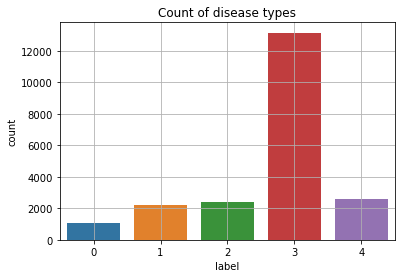

In [4]:
sns.countplot(train['label'])
plt.title('Count of disease types')
plt.grid()
plt.show()

In [5]:
second_id = []
second_label = []

for img in os.listdir(os.path.join(train_path_second, 'cbb')):
    second_id.append(train_path_second+'/cbb/'+img)
    second_label.append('0')
    
for img in os.listdir(os.path.join(train_path_second, 'cbsd')):
    second_id.append(train_path_second+'/cbsd/'+img)
    second_label.append('1')
    
for img in os.listdir(os.path.join(train_path_second, 'cgm')):
    second_id.append(train_path_second+'/cgm/'+img)
    second_label.append('2')
    
for img in os.listdir(os.path.join(train_path_second, 'cmd')):
    second_id.append(train_path_second+'/cmd/'+img)
    second_label.append('3')
    
for img in os.listdir(os.path.join(train_path_second, 'healthy')):
    second_id.append(train_path_second+'/healthy/'+img)
    second_label.append('4')

In [6]:
train_second = pd.DataFrame({'image_id':second_id, 'label':second_label})

train_second.tail()

,image_id,label
5651,../input/more-cassava-disease/train/train/trai...,4
5652,../input/more-cassava-disease/train/train/trai...,4
5653,../input/more-cassava-disease/train/train/trai...,4
5654,../input/more-cassava-disease/train/train/trai...,4
5655,../input/more-cassava-disease/train/train/trai...,4


In [7]:
del second_id
del second_label

In [8]:
def image_path_first(image):
    return os.path.join(train_path,image)

train['image_id'] = train['image_id'].apply(image_path_first)

In [9]:
train['label'] = train['label'].astype('str')

In [10]:
train.tail()

,image_id,label
21392,../input/cassava-leaf-disease-classification/t...,3
21393,../input/cassava-leaf-disease-classification/t...,3
21394,../input/cassava-leaf-disease-classification/t...,1
21395,../input/cassava-leaf-disease-classification/t...,4
21396,../input/cassava-leaf-disease-classification/t...,4


In [11]:
# combine dataframe to train

train = pd.concat([train, train_second], ignore_index=True)

train.tail()

,image_id,label
27048,../input/more-cassava-disease/train/train/trai...,4
27049,../input/more-cassava-disease/train/train/trai...,4
27050,../input/more-cassava-disease/train/train/trai...,4
27051,../input/more-cassava-disease/train/train/trai...,4
27052,../input/more-cassava-disease/train/train/trai...,4


In [12]:
del train_second
del train_path
del train_path_second

C:\Users\pomat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


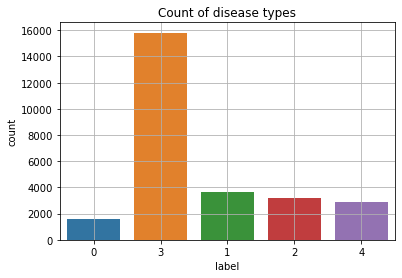

In [13]:
sns.countplot(train['label'])
plt.title('Count of disease types')
plt.grid()
plt.show()

In [14]:
SKF = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [15]:
train_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
                                horizontal_flip=True, vertical_flip=True, fill_mode='nearest', brightness_range=[0.7, 1.3],
                                rotation_range=270, zoom_range=0.2, shear_range=10, width_shift_range=0.2, height_shift_range=0.2,
                                rescale = 1./255)

val_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input, rescale=1./255)

In [16]:
def build_resnet50():
    model = Sequential()
    model.add(Resizing(image_size, image_size))
    model.add(ResNet50(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    
    return model

In [17]:
fold_var = 1

all_val_acc = []

Found 21642 validated image filenames belonging to 5 classes.
Found 5411 validated image filenames belonging to 5 classes.
Fold num: 1
Train length: 1353
Val length: 339
Epoch 1/30
1353/1353 [==============================] - ETA: 0s - loss: 1.2253 - accuracy: 0.6197
Epoch 00001: val_loss improved from inf to 0.79488, saving model to ./k_fold_resnet\checkpoint_1.h5
1353/1353 [==============================] - 463s 342ms/step - loss: 1.2253 - accuracy: 0.6197 - val_loss: 0.7949 - val_accuracy: 0.7596
Epoch 2/30
1353/1353 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.7286
Epoch 00002: val_loss improved from 0.79488 to 0.61500, saving model to ./k_fold_resnet\checkpoint_1.h5
1353/1353 [==============================] - 466s 344ms/step - loss: 0.8790 - accuracy: 0.7286 - val_loss: 0.6150 - val_accuracy: 0.7962
Epoch 3/30
1353/1353 [==============================] - ETA: 0s - loss: 0.7602 - accuracy: 0.7598
Epoch 00003: val_loss did not improve from 0.61500

Epoch 

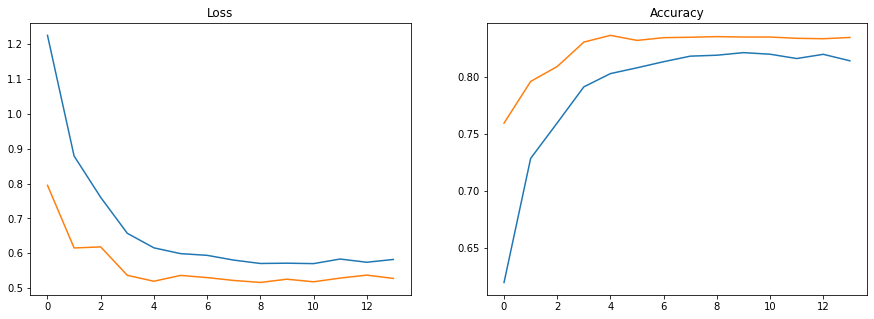

Found 21642 validated image filenames belonging to 5 classes.
Found 5411 validated image filenames belonging to 5 classes.
Fold num: 2
Train length: 1353
Val length: 339
Epoch 1/30
1353/1353 [==============================] - ETA: 0s - loss: 1.2356 - accuracy: 0.6020
Epoch 00001: val_loss improved from inf to 0.82493, saving model to ./k_fold_resnet\checkpoint_2.h5
1353/1353 [==============================] - 458s 339ms/step - loss: 1.2356 - accuracy: 0.6020 - val_loss: 0.8249 - val_accuracy: 0.7625
Epoch 2/30
1353/1353 [==============================] - ETA: 0s - loss: 0.8464 - accuracy: 0.7335
Epoch 00002: val_loss improved from 0.82493 to 0.72272, saving model to ./k_fold_resnet\checkpoint_2.h5
1353/1353 [==============================] - 455s 336ms/step - loss: 0.8464 - accuracy: 0.7335 - val_loss: 0.7227 - val_accuracy: 0.7830
Epoch 3/30
1353/1353 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.7611
Epoch 00003: val_loss did not improve from 0.72272

Epoch 

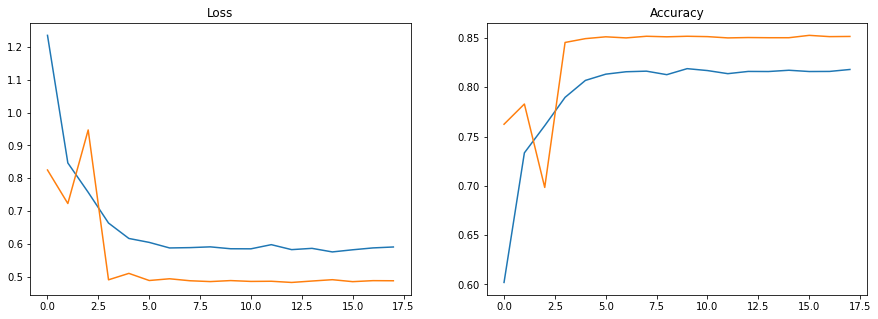

Found 21642 validated image filenames belonging to 5 classes.
Found 5411 validated image filenames belonging to 5 classes.
Fold num: 3
Train length: 1353
Val length: 339
Epoch 1/30
1353/1353 [==============================] - ETA: 0s - loss: 1.2694 - accuracy: 0.5852
Epoch 00001: val_loss improved from inf to 0.74596, saving model to ./k_fold_resnet\checkpoint_3.h5
1353/1353 [==============================] - 459s 339ms/step - loss: 1.2694 - accuracy: 0.5852 - val_loss: 0.7460 - val_accuracy: 0.7668
Epoch 2/30
1353/1353 [==============================] - ETA: 0s - loss: 0.8517 - accuracy: 0.7325
Epoch 00002: val_loss improved from 0.74596 to 0.69028, saving model to ./k_fold_resnet\checkpoint_3.h5
1353/1353 [==============================] - 459s 339ms/step - loss: 0.8517 - accuracy: 0.7325 - val_loss: 0.6903 - val_accuracy: 0.7716
Epoch 3/30
1353/1353 [==============================] - ETA: 0s - loss: 0.7569 - accuracy: 0.7578
Epoch 00003: val_loss improved from 0.69028 to 0.61387, sa

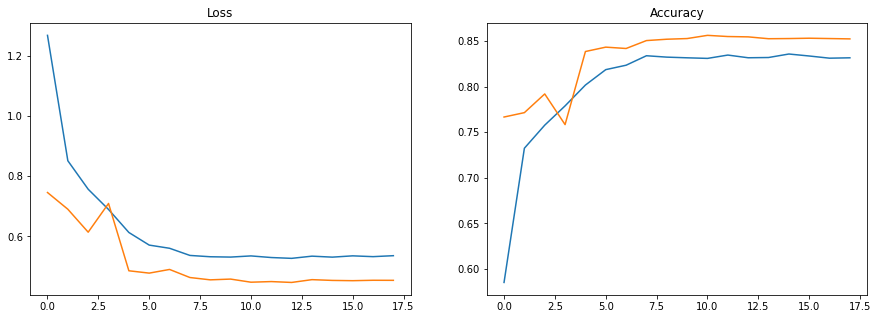

Found 21643 validated image filenames belonging to 5 classes.
Found 5410 validated image filenames belonging to 5 classes.
Fold num: 4
Train length: 1353
Val length: 339
Epoch 1/30
1353/1353 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.6107
Epoch 00001: val_loss improved from inf to 1.58138, saving model to ./k_fold_resnet\checkpoint_4.h5
1353/1353 [==============================] - 462s 342ms/step - loss: 1.2142 - accuracy: 0.6107 - val_loss: 1.5814 - val_accuracy: 0.6213
Epoch 2/30
1353/1353 [==============================] - ETA: 0s - loss: 0.8332 - accuracy: 0.7380
Epoch 00002: val_loss improved from 1.58138 to 0.61198, saving model to ./k_fold_resnet\checkpoint_4.h5
1353/1353 [==============================] - 459s 339ms/step - loss: 0.8332 - accuracy: 0.7380 - val_loss: 0.6120 - val_accuracy: 0.8126
Epoch 3/30
1353/1353 [==============================] - ETA: 0s - loss: 0.7544 - accuracy: 0.7596
Epoch 00003: val_loss did not improve from 0.61198

Epoch 

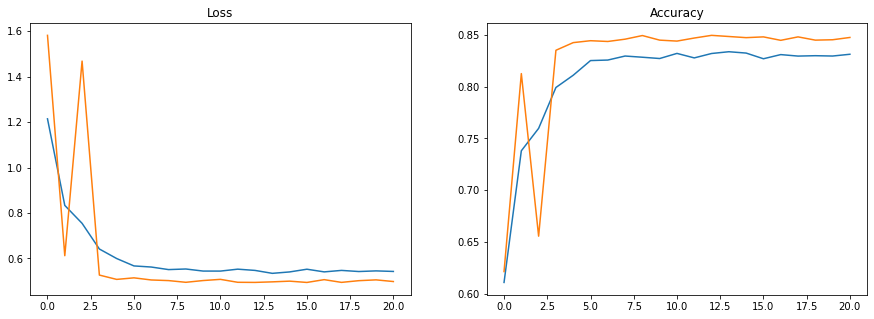

Found 21643 validated image filenames belonging to 5 classes.
Found 5410 validated image filenames belonging to 5 classes.
Fold num: 5
Train length: 1353
Val length: 339
Epoch 1/30
1353/1353 [==============================] - ETA: 0s - loss: 1.1373 - accuracy: 0.6447
Epoch 00001: val_loss improved from inf to 0.80171, saving model to ./k_fold_resnet\checkpoint_5.h5
1353/1353 [==============================] - 463s 342ms/step - loss: 1.1373 - accuracy: 0.6447 - val_loss: 0.8017 - val_accuracy: 0.7715
Epoch 2/30
1353/1353 [==============================] - ETA: 0s - loss: 0.8315 - accuracy: 0.7403
Epoch 00002: val_loss improved from 0.80171 to 0.62951, saving model to ./k_fold_resnet\checkpoint_5.h5
1353/1353 [==============================] - 459s 340ms/step - loss: 0.8315 - accuracy: 0.7403 - val_loss: 0.6295 - val_accuracy: 0.7930
Epoch 3/30
1353/1353 [==============================] - ETA: 0s - loss: 0.7449 - accuracy: 0.7615
Epoch 00003: val_loss improved from 0.62951 to 0.48088, sa

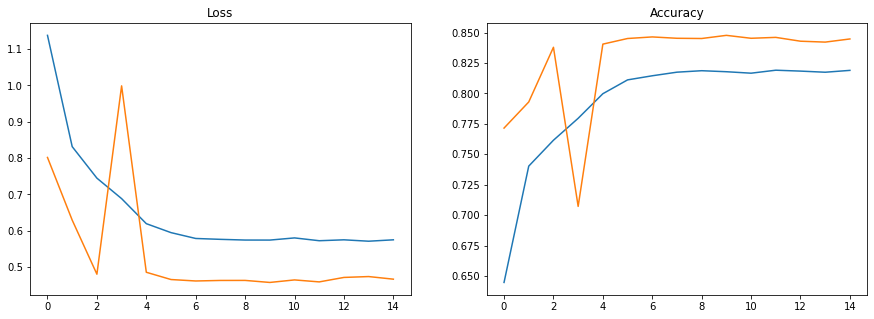

In [18]:
for train_idx, val_idx in SKF.split(train, train['label']):
    training_data = train.iloc[train_idx]
    validation_data = train.iloc[val_idx]
    
    # generator
    train_generator = train_gen.flow_from_dataframe(dataframe=training_data, directory=None, x_col='image_id', y_col='label',
                                                batch_size=batch_size, seed=1, shuffle=True,
                                                class_mode='categorical', target_size=(image_size,image_size))

    validation_generator = val_gen.flow_from_dataframe(dataframe=validation_data, directory=None, x_col='image_id', y_col='label',
                                                   batch_size=batch_size, seed=1, shuffle=False,
                                                   class_mode='categorical', target_size=(image_size,image_size))
    
    print('Fold num:', fold_var)
    print('Train length:', len(train_generator))
    print('Val length:', len(validation_generator))
    
    # build model
    model = build_resnet50()
    
    # compile
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])
    
    # callbacks
    checkpoint_filename = './k_fold_resnet/checkpoint_' + str(fold_var) + '.h5'
    
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(checkpoint_filename, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=1, min_lr=0, verbose=1)
    
    # fit
    history = model.fit(train_generator, epochs=30, validation_data=validation_generator, verbose=1,
                        batch_size=batch_size,
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])
                        
    # save model
    model_filename = './k_fold_resnet/' + str(fold_var) + '.h5'
    model.save(model_filename)
    
    results = pd.DataFrame(history.history)
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(results[['loss', 'val_loss']])
    axs[0].set_title('Loss')
    axs[1].plot(results[['accuracy', 'val_accuracy']])
    axs[1].set_title('Accuracy')
    plt.show()
    
    all_val_acc.append(history.history['val_accuracy'][-5])
    
    K.clear_session()
    del(model)
    
    fold_var += 1

In [28]:
print(np.mean(all_val_acc))

0.8456362962722779


In [30]:
model = keras.models.load_model('./k_fold_resnet/checkpoint_3.h5')

In [20]:
test = pd.read_csv('../input/more-cassava-disease/sample_submission_file.csv')

In [26]:
test_path = '../input/more-cassava-disease/test/test/test/0'

def test_image_path(image):
    return os.path.join(test_path,image)

test['image_id'] = test['image_id'].apply(test_image_path)
test['label'].replace('cbb', '0', inplace=True)
test['label'].replace('cbsd', '1', inplace=True)
test['label'].replace('cgm', '2', inplace=True)
test['label'].replace('cmd', '3', inplace=True)
test['label'].replace('healthy', '4', inplace=True)

In [27]:
test = test[['image_id', 'label']]

test.tail()

,image_id,label
3769,../input/more-cassava-disease/test/test/test/0...,0
3770,../input/more-cassava-disease/test/test/test/0...,2
3771,../input/more-cassava-disease/test/test/test/0...,4
3772,../input/more-cassava-disease/test/test/test/0...,0
3773,../input/more-cassava-disease/test/test/test/0...,4


In [23]:
test_generator = val_gen.flow_from_dataframe(dataframe=test, directory=None, x_col='image_id', y_col='label',
                                              preprocessing_function=applications.resnet50.preprocess_input,
                                              class_mode='categorical', target_size=(image_size,image_size))

Found 3774 validated image filenames belonging to 5 classes.


In [36]:
print(test_generator.classes)

[1, 3, 0, 3, 1, 1, 2, 1, 3, 2, 3, 2, 2, 0, 2, 0, 2, 2, 0, 2, 3, 4, 4, 1, 4, 2, 2, 1, 2, 2, 1, 2, 3, 3, 4, 3, 0, 0, 2, 2, 0, 1, 1, 3, 2, 2, 3, 4, 2, 4, 0, 0, 2, 4, 3, 3, 3, 3, 0, 2, 2, 2, 3, 0, 1, 1, 1, 0, 0, 4, 4, 2, 4, 4, 1, 3, 2, 1, 1, 1, 3, 2, 4, 3, 3, 2, 4, 2, 2, 1, 0, 2, 3, 2, 2, 4, 4, 4, 3, 1, 3, 1, 0, 3, 4, 3, 3, 1, 3, 4, 4, 1, 2, 4, 0, 4, 1, 1, 4, 1, 4, 0, 4, 0, 0, 4, 1, 0, 0, 4, 1, 2, 0, 4, 1, 4, 0, 4, 4, 4, 1, 4, 3, 4, 4, 2, 3, 1, 1, 2, 4, 2, 1, 2, 3, 0, 3, 1, 2, 1, 2, 0, 0, 1, 4, 3, 0, 1, 4, 3, 4, 3, 0, 1, 2, 4, 4, 4, 3, 2, 0, 2, 2, 4, 1, 2, 1, 1, 3, 2, 1, 3, 0, 1, 4, 2, 0, 1, 0, 2, 4, 2, 0, 0, 3, 4, 3, 2, 2, 0, 0, 3, 4, 0, 4, 0, 3, 4, 3, 1, 4, 2, 1, 2, 4, 4, 1, 1, 4, 0, 4, 3, 1, 2, 2, 0, 4, 4, 4, 0, 4, 4, 1, 1, 3, 3, 0, 4, 2, 4, 1, 3, 0, 4, 1, 4, 3, 1, 3, 2, 2, 2, 4, 4, 2, 3, 4, 4, 2, 0, 3, 0, 1, 3, 0, 1, 2, 4, 4, 3, 3, 1, 3, 3, 4, 1, 4, 0, 0, 2, 1, 4, 0, 1, 3, 2, 0, 0, 1, 1, 1, 3, 1, 2, 2, 1, 1, 4, 4, 4, 3, 0, 1, 4, 1, 1, 4, 4, 4, 1, 4, 0, 2, 1, 1, 0, 1, 3, 0, 2, 0, 1, 3, 

In [31]:
output = model.predict(test_generator)

In [34]:
output = np.argmax(output, axis=1)

In [38]:
print(list(output))

[3, 4, 3, 1, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 4, 3, 1, 3, 0, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 2, 1, 3, 1, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 2, 1, 4, 3, 4, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 2, 3, 4, 1, 2, 2, 2, 3, 3, 3, 1, 4, 1, 2, 0, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 3, 1, 2, 0, 3, 3, 0, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1, 3, 1, 0, 1, 2, 4, 2, 1, 4, 1, 0, 1, 1, 3, 4, 4, 3, 2, 3, 3, 1, 1, 3, 3, 4, 0, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 4, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 3, 3, 1, 3, 4, 1, 1, 3, 1, 1, 3, 1, 4, 1, 0, 3, 3, 1, 3, 4, 3, 3, 1, 2, 3, 3, 3, 1, 4, 4, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 1, 2, 3, 1, 1, 2, 1, 1, 4, 3, 3, 2, 3, 2, 3, 1, 1, 1, 0, 1, 3, 1, 3, 3, 1, 3, 2, 4, 1, 3, 2, 4, 1, 3, 4, 4, 3, 4, 2, 2, 3, 3, 3, 2, 1, 3, 3, 1, 1, 1, 1, 4, 2, 4, 1, 3, 2, 2, 1, 

In [35]:
from sklearn.metrics import classification_report

report = classification_report(test_generator.classes, output, target_names=['CBB', 'CBSD', 'CGM', 'CMD', 'Healthy'])
print(report)

              precision    recall  f1-score   support

         CBB       0.20      0.07      0.11       753
        CBSD       0.21      0.24      0.22       731
         CGM       0.21      0.15      0.17       706
         CMD       0.22      0.51      0.31       800
     Healthy       0.20      0.09      0.12       784

    accuracy                           0.22      3774
   macro avg       0.21      0.21      0.19      3774
weighted avg       0.21      0.22      0.19      3774

